###  print out structures

In [17]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

In [18]:
def draw_nn_2(model, debug_print_01=False):
    # nn_dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right
    nn_dot = Digraph(format="svg")
    # print(model.layers)
    # for l in model.layers:
    #     pp.pprint(l.parameters())

        # with nn_dot.subgraph(name=l.layernumber, graph_attr={"rankdir": "TB"}) as c:
        # with nn_dot.subgraph(name="L", graph_attr={"rankdir": "TB"}) as c:
        #     c.attr(color="blue")
        #     c.node_attr["style"] = "filled"
        #     c.edges([("b0", "b1"), ("b1", "b2"), ("b2", "b3")])
        #     c.attr(label="layer #2")

    # with nn_dot.subgraph(name="L", graph_attr={"rankdir": "TB"}) as c:
    #     c.attr(color="blue")
    #     c.node_attr["style"] = "filled"
    #     c.edges([("b0", "b1"), ("b1", "b2"), ("b2", "b3")])
    #     c.attr(label="layer #2")

    with nn_dot.subgraph(name='cluster_0') as c:
        c.attr(style='filled', color='lightgrey')
        c.node_attr.update(style='filled', color='white')
        c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
        c.attr(label='process #1')

    with nn_dot.subgraph(name='cluster_1') as c:
        c.attr(color='blue')
        c.node_attr['style'] = 'filled'
        c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
        c.attr(label='process #2')

    with nn_dot.subgraph(name='cluster_2') as c:
        c.attr(color='blue')
        c.node_attr['style'] = 'filled'
        c.edges([('c0', 'c1'), ('b1', 'b2'), ('b2', 'b3')])
        c.attr(label='layer')

    return nn_dot

#### Multi Layer Perceptron 1-2-1

In [19]:
def draw_nn(model, debug_print_01=False):
    # nn_dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right
    nn_dot = Digraph(format="svg")
    print(model.layers)
    for l in model.layers:
        pp.pprint(l.parameters())

        with nn_dot.subgraph(name=l.layernumber, graph_attr={"rankdir": "TB"}) as c:
        # with nn_dot.subgraph(name="L", graph_attr={"rankdir": "TB"}) as c:
            c.attr(color="blue")
            c.node_attr["style"] = "filled"
            c.edges([("b0", "b1")])
            c.attr(label=l.layernumber)

    return nn_dot

layernumber == L1
nonlin == False
weightsinit == 2
debug_bw == False
layernumber == L2
nonlin == False
weightsinit == 2
debug_bw == False
[Layer of [LinearNeuron(1), LinearNeuron(1)], Layer of [LinearNeuron(2)]]
L1
[Layer of [LinearNeuron(1), LinearNeuron(1)], Layer of [LinearNeuron(2)]]
[   Value(name=v001,layernumber=L1,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=4.200000000000001),
    Value(name=v002,layernumber=L1,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0.6000000000000001),
    Value(name=v003,layernumber=L1,neuronnumber=n2,weightnumber=,type=w1,data=0.5, grad=8.400000000000002),
    Value(name=v004,layernumber=L1,neuronnumber=n2,weightnumber=,type=b,data=0, grad=1.2000000000000002)]
[   Value(name=v005,layernumber=L2,neuronnumber=n1,weightnumber=,type=w1,data=0.6000000000000001, grad=3.5),
    Value(name=v006,layernumber=L2,neuronnumber=n1,weightnumber=,type=w2,data=1.2000000000000002, grad=3.5),
    Value(name=v007,layernumber=L2,neuronnumber=n1,weightnumber=,

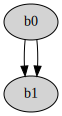

In [20]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], lastReLU=False, weightsinit=2, debug_bw=False
)  # 1-layer neural network
# print("parameters")
# pp.pprint(model.parameters())

pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(7, 7 + nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
# print("inputs")
# pp.pprint(xinput)

activation = model(xinput)
activation.backward()

# draw_dot(activation, debug_print_01=False)
draw_nn(model)